<a href="https://colab.research.google.com/github/aworklab/everydayPython/blob/main/ex_20220829.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 오늘의 목표
* customer analysis
* iterator

In [1]:
import pandas as pd 
import numpy as np
import plotnine as gg
from plotnine import ggplot, aes

import re 
import os

from datetime import datetime, date, time, timezone 
from functools import reduce 
from collections import defaultdict, ChainMap, Counter
from itertools import product, groupby

# customer analysis

In [4]:
os.listdir()

['.config',
 'online_retail_II.xlsx',
 'KPMG_VI_New_raw_data_update_final.csv',
 'KPMG_VI_New_raw_data_update_final.xlsx',
 'test.csv',
 'ecommerce-data.csv',
 'sample_data']

In [8]:
df = pd.read_excel('online_retail_II.xlsx')
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [13]:
df.columns = ['_'.join(re.split('(?=[A-Z][a-z])', a[0].lower() + a[1:])).lower().replace(' ','_') for a in df.columns]
df.head()

,invoice,stock_code,description,quantity,invoice_date,price,customer_id,country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,2009-12-01 07:45:00,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,2009-12-01 07:45:00,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,2009-12-01 07:45:00,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,2009-12-01 07:45:00,1.25,13085.0,United Kingdom


In [14]:
df = df[(~df.invoice.astype(str).str.contains('C')) & (df.country == 'United Kingdom')]

In [15]:
df['date'] = df.invoice_date.to_numpy().astype('datetime64[D]')
df['month'] = df.invoice_date.to_numpy().astype('datetime64[M]')
df['rev'] = df.quantity * df.price 
df = df[['customer_id', 'date', 'month', 'rev']].rename(columns = {'customer_id':'id'})
df = df.groupby(['id','date','month'])['rev'].sum().reset_index()
df.head()

,id,date,month,rev
0,12346.0,2009-12-14,2009-12-01,90.0
1,12346.0,2009-12-18,2009-12-01,23.5
2,12346.0,2010-01-04,2010-01-01,45.0
3,12346.0,2010-01-14,2010-01-01,22.5
4,12346.0,2010-01-22,2010-01-01,22.5


In [28]:
df_ = df.assign(week = df['date'] - df['date'].dt.weekday.astype('timedelta64[D]'))
list_npu = df.groupby(['id'])['date'].min().reset_index().rename(columns = {'date':'npu_date'})
df_ = pd.merge(df_, list_npu, 'left', 'id')
df_ = df_.assign(days = (df_['date'] - df_['npu_date']).dt.days,
                 week = df_['week'].astype(str))
df_ = df_.groupby(['week', 'days'])['id'].count().reset_index().rename(columns = {'id':'pu'})
df_['ratio'] = df_.groupby(['week'])['pu'].apply(lambda x : round(x/x.max()*100,2))
df_ = pd.melt(df_, id_vars = ['week', 'days'], var_name = 'type')
df_.head()

,week,days,type,value
0,2009-11-30,0,pu,405.0
1,2009-11-30,1,pu,11.0
2,2009-11-30,2,pu,11.0
3,2009-11-30,3,pu,5.0
4,2009-11-30,5,pu,1.0


/usr/local/lib/python3.7/dist-packages/plotnine/facets/facet.py:393: PlotnineWarning: If you need more space for the x-axis tick text use ... + theme(subplots_adjust={'wspace': 0.25}). Choose an appropriate value for 'wspace'.


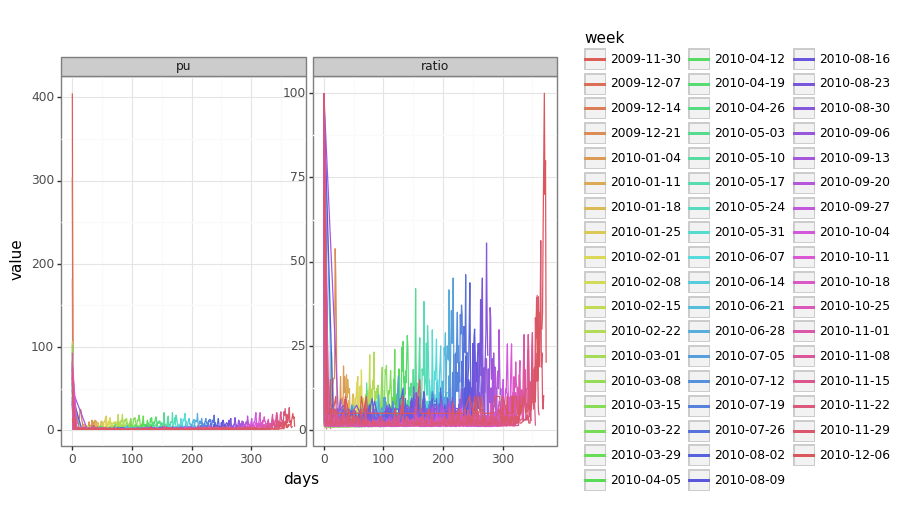

<ggplot: (8768125925921)>

In [29]:
(
    ggplot(df_, aes('days', 'value', color = 'week')) +
    gg.geom_line() +
    gg.facet_wrap('~type', scales = 'free_y') +
    gg.theme_bw()
)

# iterator

In [31]:
mat = [list('ABC'), list('DEF'), list('GHI')]
[f'({r}, {c})-{letters}' for r, rows in enumerate(mat) for c, letters in enumerate(rows)]

['(0, 0)-A',
 '(0, 1)-B',
 '(0, 2)-C',
 '(1, 0)-D',
 '(1, 1)-E',
 '(1, 2)-F',
 '(2, 0)-G',
 '(2, 1)-H',
 '(2, 2)-I']

In [32]:
users = [{'mail': 'gregorythomas@gmail.com', 'name': 'Brett Holland', 'sex': 'M', 'age': 73},
 {'mail': 'hintoncynthia@hotmail.com', 'name': 'Madison Martinez', 'sex': 'F', 'age': 29},
 {'mail': 'wwagner@gmail.com', 'name': 'Michael Jenkins', 'sex': 'M', 'age': 51},
 {'mail': 'daniel79@gmail.com', 'name': 'Karen Rodriguez', 'sex': 'F', 'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]
users

[{'mail': 'gregorythomas@gmail.com',
  'name': 'Brett Holland',
  'sex': 'M',
  'age': 73},
 {'mail': 'hintoncynthia@hotmail.com',
  'name': 'Madison Martinez',
  'sex': 'F',
  'age': 29},
 {'mail': 'wwagner@gmail.com',
  'name': 'Michael Jenkins',
  'sex': 'M',
  'age': 51},
 {'mail': 'daniel79@gmail.com',
  'name': 'Karen Rodriguez',
  'sex': 'F',
  'age': 32},
 {'mail': 'ujackson@gmail.com', 'name': 'Amber Rhodes', 'sex': 'F', 'age': 42}]

In [33]:
{key : eval(f'reduce(lambda acc, cur : acc + [cur["{key}"]], users, [])') for key in list(users[0].keys())}

{'mail': ['gregorythomas@gmail.com',
  'hintoncynthia@hotmail.com',
  'wwagner@gmail.com',
  'daniel79@gmail.com',
  'ujackson@gmail.com'],
 'name': ['Brett Holland',
  'Madison Martinez',
  'Michael Jenkins',
  'Karen Rodriguez',
  'Amber Rhodes'],
 'sex': ['M', 'F', 'M', 'F', 'F'],
 'age': [73, 29, 51, 32, 42]}

In [35]:
x, y, z = [300, 20, 10], [900, 20, 10], [1100, 20, 10]
[(a, b, c) for a, b, c in product(x, y, z)]

[(300, 900, 1100),
 (300, 900, 20),
 (300, 900, 10),
 (300, 20, 1100),
 (300, 20, 20),
 (300, 20, 10),
 (300, 10, 1100),
 (300, 10, 20),
 (300, 10, 10),
 (20, 900, 1100),
 (20, 900, 20),
 (20, 900, 10),
 (20, 20, 1100),
 (20, 20, 20),
 (20, 20, 10),
 (20, 10, 1100),
 (20, 10, 20),
 (20, 10, 10),
 (10, 900, 1100),
 (10, 900, 20),
 (10, 900, 10),
 (10, 20, 1100),
 (10, 20, 20),
 (10, 20, 10),
 (10, 10, 1100),
 (10, 10, 20),
 (10, 10, 10)]

In [40]:
def add_arthor(func) :
  def wrapper(*args, **kwargs) :
    return 'wow' + '\n' + func(*args, **kwargs)
  return wrapper 

@add_arthor
def get_title(title) :
  return title 

@add_arthor
def get_title2(t1, t2) :
  return t1 + t2

In [41]:
print(get_title('hello'))

wow
hello


In [43]:
print(get_title2('hello', 'world'))

wow
helloworld
